## Create Latitute and Longitude combinations ##

In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

### Import Dependencies, and Initialize an Empty List and Counters ###

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=acaab747401397067ebb377d664bbb0f


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Conver the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experience, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------------------")
print("Data Retrieval Complete            ")
print("-----------------------------------------")

Beginning Data Retrieval         
---------------------------------------
Processing Record 1 of Set 1 | asuncion nochixtlan
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | la ronge
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | siavonga
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | timizart
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | maxixe
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | quang ngai
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | arlit
Processing Record 21 of Set 1 | akde

Processing Record 38 of Set 4 | kilindoni
Processing Record 39 of Set 4 | makakilo city
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | uzhur
Processing Record 42 of Set 4 | viedma
Processing Record 43 of Set 4 | daoukro
Processing Record 44 of Set 4 | morehead
Processing Record 45 of Set 4 | birobidzhan
Processing Record 46 of Set 4 | poum
Processing Record 47 of Set 4 | richards bay
Processing Record 48 of Set 4 | aksarka
Processing Record 49 of Set 4 | burica
City not found. Skipping...
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | hay river
Processing Record 5 of Set 5 | honiara
Processing Record 6 of Set 5 | angoche
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | paamiut
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | asau
Processing Record 11 of Set 5 | egvekin

Processing Record 32 of Set 8 | yatou
Processing Record 33 of Set 8 | ondjiva
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | jashpurnagar
Processing Record 36 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 37 of Set 8 | naustdal
Processing Record 38 of Set 8 | jacqueville
Processing Record 39 of Set 8 | mareeba
Processing Record 40 of Set 8 | lae
Processing Record 41 of Set 8 | san pedro
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | kungurtug
Processing Record 44 of Set 8 | ambilobe
Processing Record 45 of Set 8 | raymondville
Processing Record 46 of Set 8 | touros
Processing Record 47 of Set 8 | murdochville
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | brahmapuri
City not found. Skipping...
Processing Record 50 of Set 8 | zlobin
Processing Record 1 of Set 9 | beringovskiy
Processing Record 2 of Set 9 | sao jose da coroa grande
Processing Record 3 of Set 9 | santa catalina
Processing

Processing Record 20 of Set 12 | bologoye
Processing Record 21 of Set 12 | qinhuangdao
Processing Record 22 of Set 12 | mayumba
Processing Record 23 of Set 12 | pidhorodne
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | morro bay
Processing Record 26 of Set 12 | baykit
Processing Record 27 of Set 12 | riberalta
Processing Record 28 of Set 12 | nalut
Processing Record 29 of Set 12 | aykhal
Processing Record 30 of Set 12 | sataua
City not found. Skipping...
Processing Record 31 of Set 12 | wamba
Processing Record 32 of Set 12 | boffa
Processing Record 33 of Set 12 | agadez
Processing Record 34 of Set 12 | dalhousie
Processing Record 35 of Set 12 | marzuq
Processing Record 36 of Set 12 | eyl
Processing Record 37 of Set 12 | kamenka
Processing Record 38 of Set 12 | shingu
Processing Record 39 of Set 12 | umm lajj
Processing Record 40 of Set 12 | ust-nera
Processing Record 41 of Set 12 | basco
Processing Record 42 of Set 12 | high level
Processing Record 43 of Set 12 |

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asuncion Nochixtlan,17.4667,-97.2333,51.55,95,96,6.15,MX,2021-11-08 02:42:16
1,Butaritari,3.0707,172.7902,82.06,70,13,10.85,KI,2021-11-08 02:41:56
2,Tual,-5.6667,132.7500,84.79,73,36,7.31,ID,2021-11-08 02:39:45
3,La Ronge,55.1001,-105.2842,28.65,93,1,3.44,CA,2021-11-08 02:42:16
4,Hermanus,-34.4187,19.2345,56.89,73,56,3.78,ZA,2021-11-08 02:36:44
5,Hobart,-42.8794,147.3294,69.03,43,75,1.01,AU,2021-11-08 02:40:53
6,Esperance,-33.8667,121.9000,67.84,56,100,12.57,AU,2021-11-08 02:38:02
7,Siavonga,-16.5382,28.7088,77.56,37,54,4.54,ZM,2021-11-08 02:42:17
8,Faanui,-16.4833,-151.7500,79.52,74,23,9.53,PF,2021-11-08 02:42:17
9,Timizart,36.8000,4.2667,52.32,94,100,8.72,DZ,2021-11-08 02:39:39


In [14]:
#Reorder columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df[new_column_order]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asuncion Nochixtlan,17.4667,-97.2333,51.55,95,96,6.15,MX,2021-11-08 02:42:16
1,Butaritari,3.0707,172.7902,82.06,70,13,10.85,KI,2021-11-08 02:41:56
2,Tual,-5.6667,132.7500,84.79,73,36,7.31,ID,2021-11-08 02:39:45
3,La Ronge,55.1001,-105.2842,28.65,93,1,3.44,CA,2021-11-08 02:42:16
4,Hermanus,-34.4187,19.2345,56.89,73,56,3.78,ZA,2021-11-08 02:36:44


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1636341418.387819

### Plot Latitude vs. Max Temperature ###

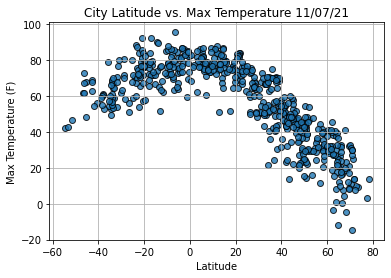

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs, Humidity ###

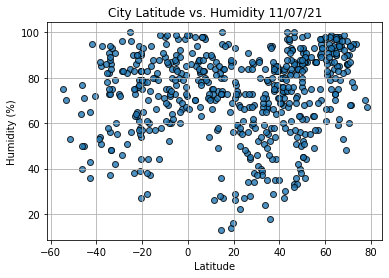

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

### Plot Latitude vs Cloudiness ###

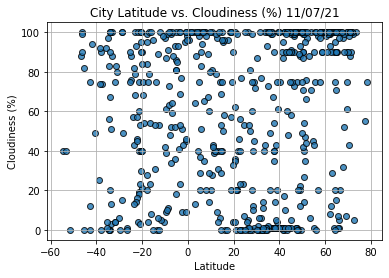

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

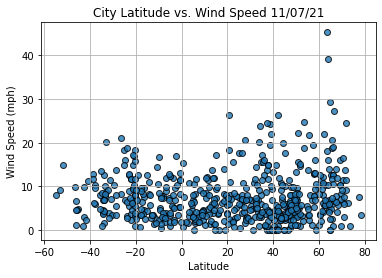

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()